In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from scipy.integrate import odeint
import pandas as pd
import seaborn
from scipy import stats
import seaborn as sns

In [42]:
df_genus=pd.read_excel('IGCGenusNormalizationProfileTable.xlsx')
df_KO=pd.read_excel('IGCKOnormalizationProfileTable.xlsx')

In [43]:
index_American=np.arange(1,140,1)
index_Danish=np.arange(236,637,1)
index_Spanish=np.concatenate((np.arange(763,916,1),np.arange(1062,1268,1)))
index_AllThree=np.concatenate((index_American,index_Danish,index_Spanish))

In [44]:
genus_American=df_genus.iloc[:,index_American]
genus_Danish=df_genus.iloc[:,index_Danish]
genus_Spanish=df_genus.iloc[:,index_Spanish]
genus_AllThree=df_genus.iloc[:,index_AllThree]

KO_American=df_KO.iloc[:,index_American]
KO_Danish=df_KO.iloc[:,index_Danish]
KO_Spanish=df_KO.iloc[:,index_Spanish]
KO_AllThree=df_KO.iloc[:,index_AllThree]

In [45]:
KO_List=df_KO.iloc[:,0]
Genus_List=df_genus.iloc[:,0]

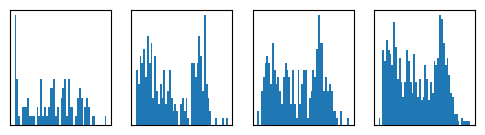

In [46]:
TargetGene='K11707'
plt.figure(figsize=(6,1.5))
for i in range(len(KO_List)):
    if KO_List[i]==TargetGene:
        temp0=KO_American.iloc[i,:]
        temp=temp0[temp0>0]
        plt.subplot(1,4,1)
        plt.hist(np.log10(temp),bins=50)
        plt.xticks([])
        plt.yticks([])

        temp0=KO_Danish.iloc[i,:]
        temp=temp0[temp0>0]
        plt.subplot(1,4,2)
        plt.hist(np.log10(temp),bins=50)
        plt.xticks([])
        plt.yticks([])

        temp0=KO_Spanish.iloc[i,:]
        temp=temp0[temp0>0]
        plt.subplot(1,4,3)
        plt.hist(np.log10(temp),bins=50)
        plt.xticks([])
        plt.yticks([])

        temp0=KO_AllThree.iloc[i,:]
        temp=temp0[temp0>0]
        plt.subplot(1,4,4)
        plt.hist(np.log10(temp),bins=50)
        plt.xticks([])
        plt.yticks([])

        break

In [47]:
GenusRichness=np.zeros(np.size(KO_AllThree,1))
GenusDiversity=np.zeros(np.size(KO_AllThree,1))
KORichness=np.zeros(np.size(KO_AllThree,1))
KODiversity=np.zeros(np.size(KO_AllThree,1))
for i in range(np.size(KO_AllThree,1)):
    temp0=genus_AllThree.iloc[:,i]
    temp=temp0[temp0>0]
    GenusRichness[i]=len(temp)
    temp1=temp/sum(temp)
    GenusDiversity[i]=-sum(np.multiply(temp,np.log(temp)))

    temp0=KO_AllThree.iloc[:,i]
    temp=temp0[temp0>0]
    KORichness[i]=len(temp)
    temp1=temp/sum(temp)
    KODiversity[i]=-sum(np.multiply(temp,np.log(temp)))


In [48]:
KO_MeanAbundance=np.zeros(len(KO_List))
for i in range(len(KO_List)):
    KO_MeanAbundance[i]=np.mean(KO_AllThree.iloc[i,:])

In [49]:
TargetGenes=['K02663','K03006','K03283','K03289','K07671','K09802','K11707','K11708','K11709','K11710','K12436']
CovaryMatrix=np.zeros((len(TargetGenes),4))
for j in range(len(TargetGenes)):
    TargetGene=TargetGenes[j]
    for i in range(len(KO_List)):
        if KO_List[i]==TargetGene:
            temp0=KO_AllThree.iloc[i,:]
            p0=stats.spearmanr(temp0,GenusRichness)
            p1=stats.spearmanr(temp0,GenusDiversity)
            p2=stats.spearmanr(temp0,KORichness)
            p3=stats.spearmanr(temp0,KODiversity)
            CovaryMatrix[j,0]=p0[0]
            CovaryMatrix[j,1]=p1[0]
            CovaryMatrix[j,2]=p2[0]
            CovaryMatrix[j,3]=p3[0]
            break

In [50]:
print(np.mean(KODiversity))

7.335380860574175


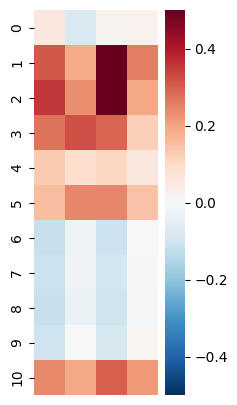

In [51]:
plt.figure(figsize=(2,5))
sns.heatmap(CovaryMatrix, annot=False, cmap='RdBu_r',vmin=-0.5,vmax=0.5)
plt.xticks([])
plt.savefig("CovaryMatrix.pdf", format='pdf', bbox_inches='tight')
plt.show()

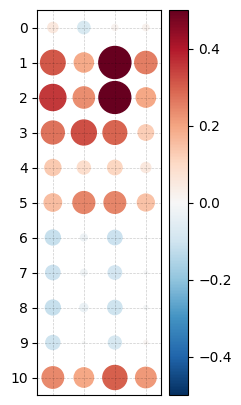

In [52]:
plt.figure(figsize=(2,5))

# Generate x and y coordinates for the scatter plot
x, y = np.meshgrid(np.arange(CovaryMatrix.shape[1]), np.arange(CovaryMatrix.shape[0]))
x = x.flatten()
y = y.flatten()

# Flatten the CovaryMatrix
values = CovaryMatrix.flatten()
abs_values = np.abs(values)

# Set the size of the dots based on absolute values
sizes = abs_values * 1000  # You can adjust the scaling factor

# Add horizontal reference lines
for y_coord in range(11):
    plt.axhline(y=y_coord, color='black', linestyle='--', linewidth=0.5,alpha=0.2)

# Add vertical reference lines
for x_coord in range(4):
    plt.axvline(x=x_coord, color='black', linestyle='--', linewidth=0.5,alpha=0.2)


# Create the scatter plot
sc=plt.scatter(x, y, c=values, s=sizes, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
# Add the colorbar
plt.colorbar(sc)

# Invert the y-axis
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlim(-0.5, 3.5)
plt.savefig("CovaryMatrix_dots.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [53]:
CovaryMatrix_df = pd.DataFrame(CovaryMatrix)

# Export CovaryMatrix to an Excel file
CovaryMatrix_df.to_excel('CovaryMatrix.xlsx', index=False)

0.5246268216058815


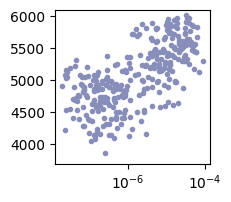

In [54]:
TargetGene='K03283'
plt.figure(figsize=(2,2))
for i in range(len(KO_List)):
        if KO_List[i]==TargetGene:
            temp0=KO_AllThree.iloc[i,:]
            plt.plot(temp0,KORichness,'.',color='#888EBA')
            plt.xscale('log')
            plt.ylim(3700,6100)
plt.savefig("K03283_GeneRichness.pdf", format='pdf', bbox_inches='tight')
print(CovaryMatrix[2,2])
plt.show()

0.5312189399905834


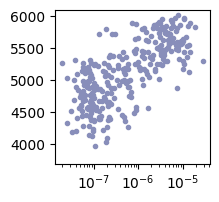

In [55]:
TargetGene='K03006'
plt.figure(figsize=(2,2))
for i in range(len(KO_List)):
        if KO_List[i]==TargetGene:
            temp0=KO_AllThree.iloc[i,:]
            plt.plot(temp0,KORichness,'.',color='#888EBA')
            plt.xscale('log')
            plt.ylim(3700,6100)
plt.savefig("K03006_GeneRichness.pdf", format='pdf', bbox_inches='tight')
print(CovaryMatrix[1,2])
plt.show()

In [56]:
TargetGenes=['K02663','K03006','K03283','K03289','K07671','K09802','K11707','K11708','K11709','K11710','K12436']
GenevaryMatrix=np.zeros((len(TargetGenes),len(KO_List)))
for j in range(len(TargetGenes)):
    TargetGene=TargetGenes[j]
    for i in range(len(KO_List)):
        if KO_List[i]==TargetGene:
            print(j)
            temp0=KO_AllThree.iloc[i,:]
            for k in range(len(KO_List)):
                temp1=KO_AllThree.iloc[k,:]
                p=stats.spearmanr(temp0,temp1)
                GenevaryMatrix[j,k]=p[0]
            break

0


c:\Users\tengw\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


1
2
3
4
5
6
7
8
9
10


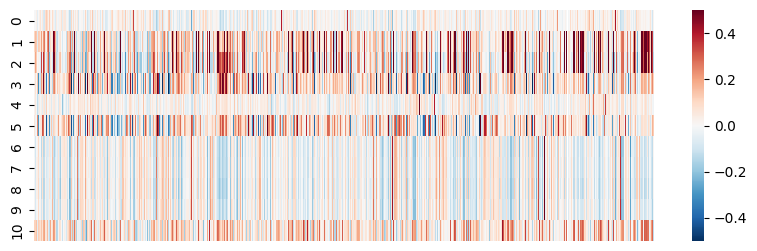

In [57]:
plt.figure(figsize=(10,3))
sns.heatmap(GenevaryMatrix, annot=False, cmap='RdBu_r',vmin=-0.5,vmax=0.5)
plt.xticks([])
plt.savefig("GenevaryMatrix.pdf", format='pdf', bbox_inches='tight')
plt.savefig("GenevaryMatrix.png", format='png',dpi=2000)
#plt.yticks([])
plt.show()

In [58]:
GenevaryMatrix_trans_df = pd.DataFrame(np.transpose(GenevaryMatrix))

# Export GenevaryMatrix to an Excel file
GenevaryMatrix_trans_df.to_excel('GenevaryMatrix.xlsx', index=False)
KO_List.to_excel('KO_List.xlsx', index=False)

In [59]:
print(np.size(GenevaryMatrix,1))

6986


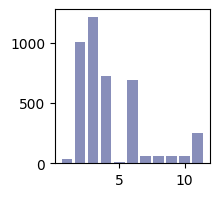

In [60]:
NN=np.zeros(np.size(GenevaryMatrix,0))
for i in range(np.size(GenevaryMatrix,0)):
    temp=GenevaryMatrix[i,:]
    NN[i]=sum(abs(temp)>0.3)
plt.figure(figsize=(2,2))
plt.bar(np.arange(1,12,1),NN,color='#888EBA')
plt.savefig("GeneVaryNumber_1.pdf", format='pdf', bbox_inches='tight')
#plt.yscale('log')

[ 14. 875. 889. 411.   3. 194.  25.  25.  25.  25.  33.]


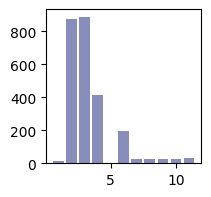

In [61]:
NN=np.zeros(np.size(GenevaryMatrix,0))
for i in range(np.size(GenevaryMatrix,0)):
    temp=GenevaryMatrix[i,:]
    NN[i]=sum(abs(temp)>0.4)
plt.figure(figsize=(2,2))
print(NN)
plt.bar(np.arange(1,12,1),NN,color='#888EBA')
plt.savefig("GeneVaryNumber_2.pdf", format='pdf', bbox_inches='tight')
#plt.yscale('log')

[  5. 708. 724. 147.   2.  27.  10.  10.  10.  10.   1.]


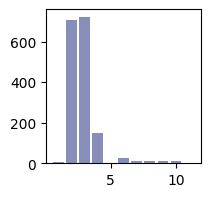

In [62]:
NN=np.zeros(np.size(GenevaryMatrix,0))
for i in range(np.size(GenevaryMatrix,0)):
    temp=GenevaryMatrix[i,:]
    NN[i]=sum(abs(temp)>0.5)
plt.figure(figsize=(2,2))
print(NN)
plt.bar(np.arange(1,12,1),NN,color='#888EBA')
plt.savefig("GeneVaryNumber_3.pdf", format='pdf', bbox_inches='tight')
#plt.yscale('log')

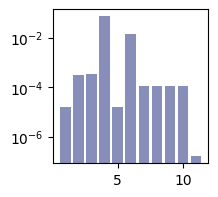

In [63]:
NN=np.zeros(np.size(GenevaryMatrix,0))
for i in range(np.size(GenevaryMatrix,0)):
    temp=GenevaryMatrix[i,:]
    NN[i]=sum(KO_MeanAbundance[abs(temp)>0.5])
plt.figure(figsize=(2,2))
plt.bar(np.arange(1,12,1),NN,color='#888EBA')
plt.savefig("GeneVaryAbundance.pdf", format='pdf', bbox_inches='tight')
plt.yscale('log')

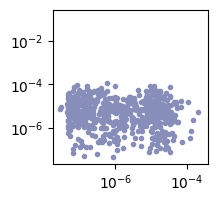

In [64]:
TargetGene='K11707'
plt.figure(figsize=(2,2))
for i in range(len(KO_List)):
        if KO_List[i]==TargetGene:
            temp0=KO_AllThree.iloc[i,:]
            break
TargetGenus='Treponema'
for i in range(len(Genus_List)):
        if Genus_List[i]==TargetGenus:
            temp1=genus_AllThree.iloc[i,:]
            break
plt.xscale('log')
plt.yscale('log')
plt.plot(temp0,temp1,'.',color='#888EBA')
plt.show()

In [65]:
CoVaryGeneName=[]
for i in range(np.size(GenevaryMatrix,1)):
    if abs(GenevaryMatrix[2,i])>0.5:
        CoVaryGeneName.append(KO_List[i])
CoVaryGeneName_df = pd.DataFrame(CoVaryGeneName, columns=["Column1"])
# Export the DataFrame to an Excel file
CoVaryGeneName_df.to_excel("CoVaryGeneName_K03283.xlsx", index=False) 
KO_List.to_excel("AllGeneList.xlsx", index=False) 